## 5.2 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
5장에서 사용할 데이터인 쿼라 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  
- 질문 중복 분석
- 라벨 빈도 분석
- 문자 분석
- 단어 분석

In [1]:
import zipfile

In [2]:
DATA_IN_PATH = "../dataset/quora/"

In [3]:
# 압축 풀기
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()


In [4]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv(DATA_IN_PATH + "train.csv")

In [6]:
train_data.head()
# is_duplicate: 0 => 두개의 질문이 중복이 아님, 1 => 두개의 질문이 중복임

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
# 데이터의 파일 이름, 크기 출력
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB


In [8]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 404290


In [9]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()


0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [10]:
len(train_set)

808580

In [13]:
# 질문 중복 분석
print('학습 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))
    

학습 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


80만개 데이터에서 53만개가 유니크 데이터이므로, 27만개가 중복됨.

27만개 데이터는 11만개 데이터의 고유한 질문으로 이루어짐을 알 수 있음

/Users/ohyeji/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of questions')

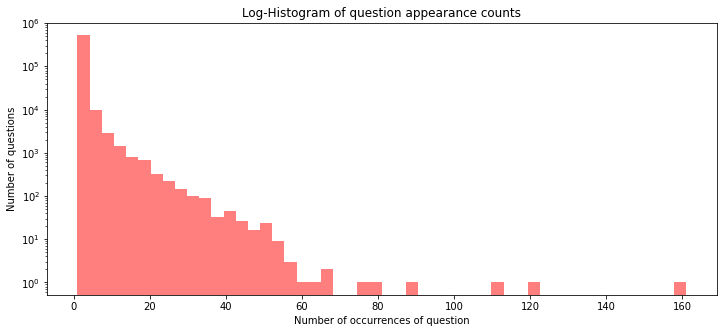

In [14]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [15]:
train_set.value_counts()

What are the best ways to lose weight?                                             161
How can you look at someone's private Instagram account without following them?    120
How can I lose weight quickly?                                                     111
What's the easiest way to make money online?                                        88
Can you see who views your Instagram?                                               79
                                                                                  ... 
How can I prove A×(B×C) +B×(C×A) +C×(A×B) =0?                                        1
Can carnivorous animals not survive without meat?                                    1
Is the parent cell in meiosis a gamete?                                              1
What are best movies of recent times?                                                1
Is ISIS a disgrace to Islam?                                                         1
Length: 537361, dtype: int64

In [16]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b2ab780>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b2abd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b2ab518>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b2b9320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b2b97f0>],
 'means': [<matplotlib.lines.Line2D at 0x1a1b2b95f8>]}

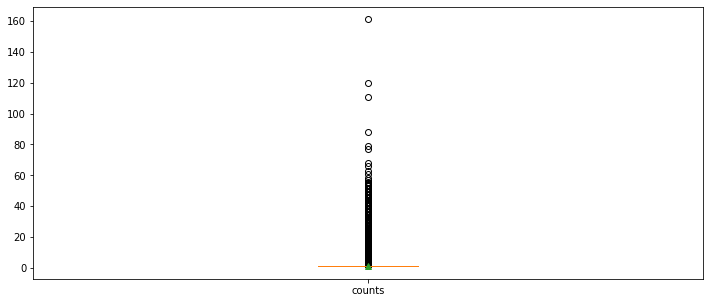

In [17]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

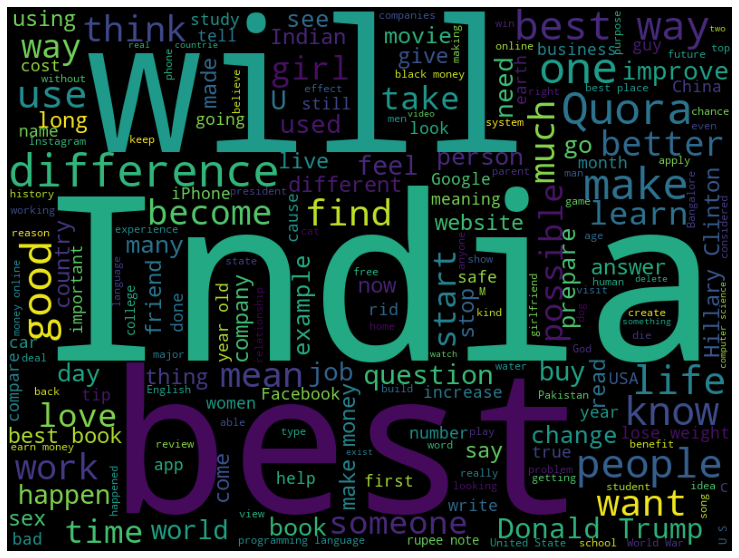

In [18]:
# 단어 빈도 분석
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

/Users/ohyeji/anaconda3/envs/tf2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

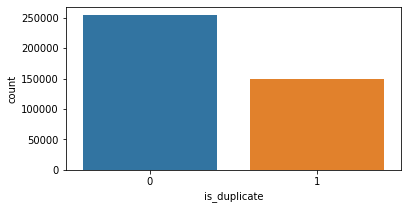

In [19]:
# 라벨 빈도 분석
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

두 레이블이 균형잡히지 않음 => 중복 아닌 데이터에 의존도가 높아지면서 데이타거 한쪽 레이블로 편향됨
- 많은 수의 데이터를 줄인 후 학습 또는 적은 수의 데이터를 늘린 후 학습

In [22]:
# 텍스트 데이터의 길이 분석 (문자단위, 단어단위)
train_length = train_set.apply(len)
print(train_length[:10])

0    66
1    51
2    73
3    50
4    76
5    86
6    19
7    30
8    31
9    60
dtype: int64


Text(0, 0.5, 'Probability')

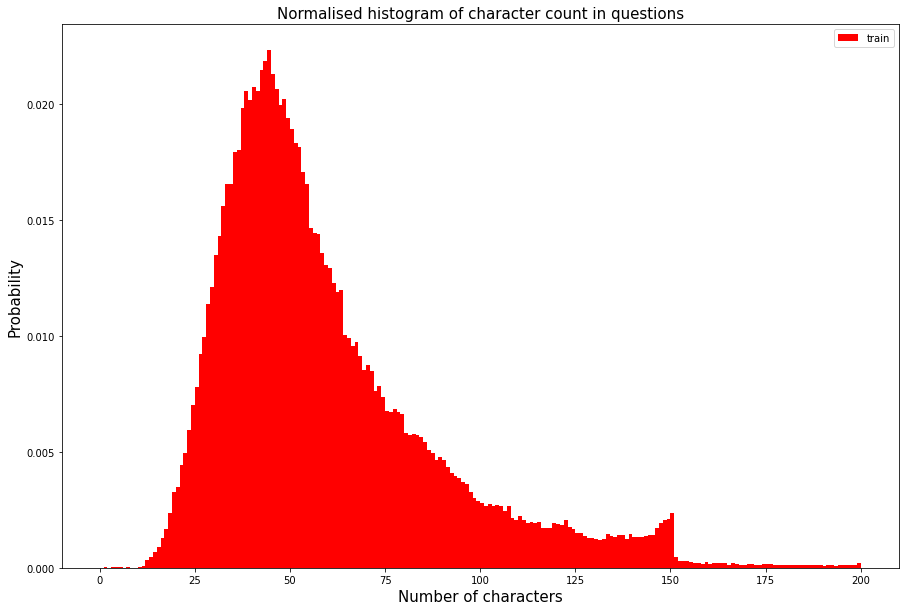

In [26]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [24]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a31fae588>,
 'caps': [<matplotlib.lines.Line2D at 0x1a31faeb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31fae320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a31d45128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a31d455f8>],
 'means': [<matplotlib.lines.Line2D at 0x1a31d45400>]}

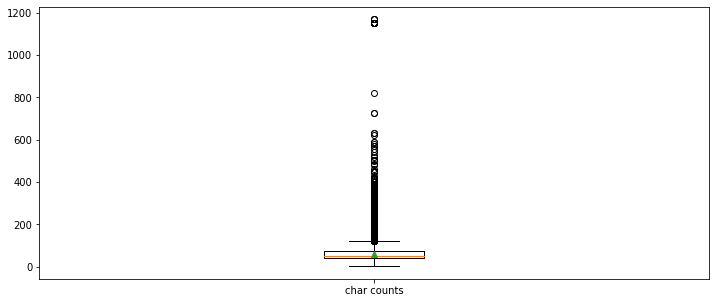

In [27]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

이상치가 너무 많음

In [28]:
# 단어 단위 분석
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

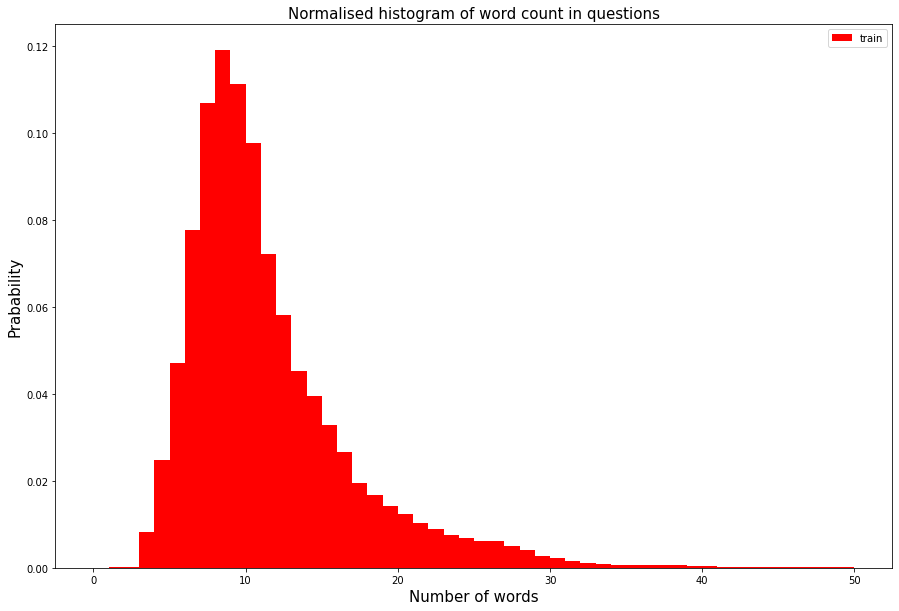

In [29]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [30]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a5327dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5328a320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5327dac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5328a8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5328ada0>],
 'means': [<matplotlib.lines.Line2D at 0x1a5328aba8>]}

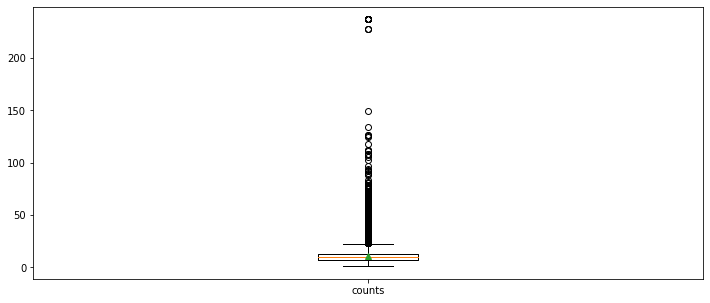

In [31]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [32]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


대부분의 질문은 물음표와 첫글자가 대문자임. 이 특징을 유지할까?
=> 모두가 가지고 있는 보편적인 특징은 제거함

***

### 데이터 전처리

In [33]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [34]:
DATA_IN_PATH = "../dataset/quora/"
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31 # 단어 개수의 99퍼센트인 31 사용. 이상치를 뺀 나머지를 포함하기 위해

change_filter = re.compile(FILTERS)

In [35]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [36]:
# 1. 라벨 개수의 균형 맞추기
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

train_neg_data = train_neg_data.sample(frac = sample_frac)

In [38]:
print("중복 질문 개수(1): {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수(0): {}".format(len(train_neg_data)))

중복 질문 개수(1): 149263
중복이 아닌 질문 개수(0): 149263


In [39]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [41]:
train_data.count()

id              298526
qid1            298526
qid2            298526
question1       298525
question2       298525
is_duplicate    298526
dtype: int64

In [44]:
# 2. 문장 문자열에 대한 전처리 (구두점 및 기호 제거, 소문자로 바꾸기)
change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
    filtered_questions1.append(re.sub(change_filter, "", q).lower())


for q in questions2:
    filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [52]:
train_data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
326549,326549,452875,452876,Is there a difference in quality between the v...,Why does audio quality go down as I turn up th...,0
356389,356389,430676,485701,How are the Indian currency notes numbered?,"Why are Indian currency notes dirty, unhygieni...",0
71755,71755,123424,123425,What is Daylight Saving Time?,Why was Daylight Saving Time invented?,0
126142,126142,203378,115724,can any one help me to get out of facing probl...,How do you ace job interviews?,0
169493,169493,262281,262282,How do you make a browser extension?,How can I make my browser extension viral ?,0


In [47]:
filtered_questions1[:5]

['is there a difference in quality between the various audio ports',
 'how are the indian currency notes numbered',
 'what is daylight saving time',
 'can any one help me to get out of facing problem to attend any interview',
 'how do you make a browser extension']

In [48]:
filtered_questions2[:5]

['why does audio quality go down as i turn up the audio',
 'why are indian currency notes dirty unhygienic and unkempt',
 'why was daylight saving time invented',
 'how do you ace job interviews',
 'how can i make my browser extension viral ']

In [53]:
# 3. 정제된 텍스트 데이터를 토크나이징하고, 각 단어를 인덱스로 바꾼다.
tokenizer = Tokenizer()
# 전체 사전을 만들기 위해서 데이터 합쳐서 토크나이징 객체를 만듬
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2) 

In [56]:
list(tokenizer.word_index)[:5]

['the', 'what', 'is', 'how', 'i']

In [58]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)


In [61]:
questions1_sequence[:5]

[[3, 44, 7, 70, 8, 608, 48, 1, 1732, 2174, 8711],
 [4, 11, 1, 81, 418, 98, 19622],
 [2, 3, 16607, 2460, 63],
 [13, 60, 49, 175, 64, 6, 27, 97, 10, 3225, 460, 6, 2381, 60, 271],
 [4, 9, 15, 53, 7, 2461, 4384]]

In [62]:
# 전체 데이터의 길이를 맞추기 위해, 정의한 최대길이보다 긴 문장은 자르고, 짧은 문장은 패딩처리
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [64]:
q1_data[:3]

array([[    3,    44,     7,    70,     8,   608,    48,     1,  1732,
         2174,  8711,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    4,    11,     1,    81,   418,    98, 19622,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    2,     3, 16607,  2460,    63,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]], dtype=int32)

In [65]:
# 4. 전처리가 끝난 데이터 저장, 단어 사전 만들기
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab['<PAD>'] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76328


In [67]:
labels[:5]

array([0, 0, 0, 0, 0])

In [84]:
# 단어 사전 저장하기 위함
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) 

In [85]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

# 각 train_q1, train_q2, label 데이터 넘파이로 따로 저장
np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

# 데이터 config (단어사전) 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [86]:
# 평가 데이터에 대해서도 앞의 전처리 과정을 동일하게 진행한 후 전처리한 데이터를 저장한다.
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

In [87]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [73]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [74]:
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [82]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)

In [83]:
test_id

array([0, 1, 2, ..., 2345793, 2345794, 2345795], dtype=object)